In [1]:
# Importing libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Activation,Reshape, Input, ReLU, Concatenate, Conv2D,MaxPooling2D, UpSampling2D, BatchNormalization, Conv2DTranspose
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Loading CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Normalizing inputs
x_train = x_train/255
x_test = x_test/255

In [4]:
# Noise (normal distribution) addition function
def noise_addition(image, mean, std):
    noise = np.random.normal(loc=mean, scale=std, size=image.shape)
    image = image + noise
    image = np.clip(image, 0., 1.)
    return image    

In [5]:
# 3 different noise levels
noisy_x_train_1 = noise_addition(x_train, 0.0, 0.1)
noisy_x_test_1 = noise_addition(x_test, 0.0, 0.1)

noisy_x_train_2 = noise_addition(x_train, 0.0, 0.3)
noisy_x_test_2 = noise_addition(x_test, 0.0, 0.3)

noisy_x_train_3 = noise_addition(x_train, 0.2, 0.2)
noisy_x_test_3 = noise_addition(x_test, 0.2, 0.2)

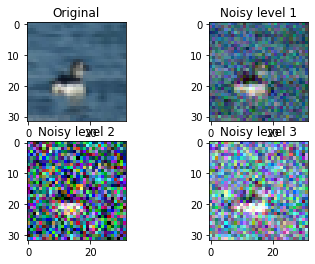

In [12]:
# Displaying original and noisy image (all 3 levels) from the dataset
index = 47
plt.subplot(2, 2, 1)
plt.imshow(x_train[index])
plt.title('Original')

plt.subplot(2, 2, 2)
plt.imshow(noisy_x_train_1[index])
plt.title('Noisy level 1')

plt.subplot(2, 2, 3)
plt.imshow(noisy_x_train_2[index])
plt.title('Noisy level 2')

plt.subplot(2, 2, 4)
plt.imshow(noisy_x_train_3[index])
plt.title('Noisy level 3')
plt.show()

In [13]:
# Encoder and Decoder definations
def encoder(x, filters, kernel_size, strides=2):
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

def decoder(x, filters, kernel_size):
    x = Conv2DTranspose(filters=filters, kernel_size=kernel_size, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

In [14]:
def autoencoder():
    autoencoder_inputs = Input(shape=(32, 32, 3), name='autoencoder_inputs')
    conv1 = encoder(autoencoder_inputs, 32, 3)
    conv2 = encoder(conv1, 64, 3)
    conv3 = encoder(conv2, 128, 3)
    conv4 = encoder(conv3, 256, 3)
    conv5 = encoder(conv4, 256, 3, 1)

    deconv1 = decoder(conv5, 256, 3)
    concat1 = Concatenate()([deconv1, conv3])
    deconv2 = decoder(concat1, 128, 3)
    concat2 = Concatenate()([deconv2, conv2])
    deconv3 = decoder(concat2, 64, 3)
    concat3 = Concatenate()([deconv3, conv1])
    deconv4 = decoder(concat3, 32, 3)

    last_decoder = Conv2DTranspose(filters=3, kernel_size=3, padding='same')(deconv4)

    autoencoder_outputs = Activation('sigmoid', name='autoencoder_outputs')(last_decoder)

    return Model(autoencoder_inputs, autoencoder_outputs, name='autoencoder')

In [15]:
denoiser_1 = autoencoder()
denoiser_1.summary()
denoiser_1.compile(loss='mse', optimizer='adam')

checkpoint = ModelCheckpoint('best_model_noise_1.h5', verbose=1, save_best_only=True, save_weights_only=True)

denoiser_1.fit(noisy_x_train_1, x_train, validation_data=(noisy_x_test_1, x_test), epochs=10, batch_size=128, callbacks=[checkpoint])

Model: "autoencoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
autoencoder_inputs (InputLayer) [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 16, 16, 32)   896         autoencoder_inputs[0][0]         
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 16, 16, 32)   128         conv2d[0][0]                     
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 16, 16, 32)   0           batch_normalization[0][0]        
________________________________________________________________________________________

391/391 [==============================] - ETA: 0s - loss: 0.0022
Epoch 00004: val_loss did not improve from 0.00208
391/391 [==============================] - 285s 729ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 5/10
391/391 [==============================] - ETA: 0s - loss: 0.0021
Epoch 00005: val_loss improved from 0.00208 to 0.00187, saving model to best_model_noise_1.h5
391/391 [==============================] - 297s 758ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 6/10
391/391 [==============================] - ETA: 0s - loss: 0.0020
Epoch 00006: val_loss improved from 0.00187 to 0.00185, saving model to best_model_noise_1.h5
391/391 [==============================] - 334s 855ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 7/10
391/391 [==============================] - ETA: 0s - loss: 0.0020
Epoch 00007: val_loss improved from 0.00185 to 0.00181, saving model to best_model_noise_1.h5
391/391 [==============================] - 320s 818ms/step - loss: 0.0020 - val_loss: 0.001

In [22]:
denoiser_2 = autoencoder()
denoiser_2.summary()
denoiser_2.compile(loss='mse', optimizer='adam')

checkpoint = ModelCheckpoint('best_model_noise_2.h5', verbose=1, save_best_only=True, save_weights_only=True)

denoiser_1.fit(noisy_x_train_2, x_train, validation_data=(noisy_x_test_2, x_test), epochs=10, batch_size=128, callbacks=[checkpoint])

Model: "autoencoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
autoencoder_inputs (InputLayer) [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 16, 16, 32)   896         autoencoder_inputs[0][0]         
__________________________________________________________________________________________________
batch_normalization_9 (BatchNor (None, 16, 16, 32)   128         conv2d_5[0][0]                   
__________________________________________________________________________________________________
re_lu_9 (ReLU)                  (None, 16, 16, 32)   0           batch_normalization_9[0][0]      
________________________________________________________________________________________

391/391 [==============================] - ETA: 0s - loss: 0.0056
Epoch 00004: val_loss did not improve from 0.00550
391/391 [==============================] - 316s 809ms/step - loss: 0.0056 - val_loss: 0.0059
Epoch 5/10
391/391 [==============================] - ETA: 0s - loss: 0.0055
Epoch 00005: val_loss did not improve from 0.00550
391/391 [==============================] - 342s 876ms/step - loss: 0.0055 - val_loss: 0.0056
Epoch 6/10
391/391 [==============================] - ETA: 0s - loss: 0.0055
Epoch 00006: val_loss improved from 0.00550 to 0.00538, saving model to best_model_noise_2.h5
391/391 [==============================] - 315s 805ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 7/10
391/391 [==============================] - ETA: 0s - loss: 0.0054
Epoch 00007: val_loss did not improve from 0.00538
391/391 [==============================] - 283s 724ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 8/10
391/391 [==============================] - ETA: 0s - loss: 0.0054
Epoch 0

In [36]:
denoiser_3 = autoencoder()
denoiser_3.summary()
denoiser_3.compile(loss='mse', optimizer='adam')

checkpoint = ModelCheckpoint('best_model_noise_3.h5', verbose=1, save_best_only=True, save_weights_only=True)

denoiser_3.fit(noisy_x_train_3, x_train, validation_data=(noisy_x_test_3, x_test), epochs=10, batch_size=128, callbacks=[checkpoint])

Model: "autoencoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
autoencoder_inputs (InputLayer) [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 16, 16, 32)   896         autoencoder_inputs[0][0]         
__________________________________________________________________________________________________
batch_normalization_27 (BatchNo (None, 16, 16, 32)   128         conv2d_15[0][0]                  
__________________________________________________________________________________________________
re_lu_27 (ReLU)                 (None, 16, 16, 32)   0           batch_normalization_27[0][0]     
________________________________________________________________________________________

391/391 [==============================] - ETA: 0s - loss: 0.0041
Epoch 00004: val_loss did not improve from 0.00512
391/391 [==============================] - 324s 830ms/step - loss: 0.0041 - val_loss: 0.0052
Epoch 5/10
391/391 [==============================] - ETA: 0s - loss: 0.0040
Epoch 00005: val_loss improved from 0.00512 to 0.00431, saving model to best_model_noise_3.h5
391/391 [==============================] - 307s 785ms/step - loss: 0.0040 - val_loss: 0.0043
Epoch 6/10
391/391 [==============================] - ETA: 0s - loss: 0.0040
Epoch 00006: val_loss did not improve from 0.00431
391/391 [==============================] - 311s 795ms/step - loss: 0.0040 - val_loss: 0.0056
Epoch 7/10
391/391 [==============================] - ETA: 0s - loss: 0.0039
Epoch 00007: val_loss improved from 0.00431 to 0.00374, saving model to best_model_noise_3.h5
391/391 [==============================] - 330s 844ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 8/10
391/391 [=====================

In [37]:
denoiser_1.load_weights('best_model_noise_1.h5')
denoised_x_test_1 = denoiser_1.predict(noisy_x_test_1)

denoiser_2.load_weights('best_model_noise_2.h5')
denoised_x_test_2 = denoiser_2.predict(noisy_x_test_2)

denoiser_3.load_weights('best_model_noise_3.h5')
denoised_x_test_3 = denoiser_3.predict(noisy_x_test_3)

In [38]:
def visualize_results(index, x_test, noisy_x_test, denoised_x_test):
    plt.subplot(1, 3, 1)
    plt.imshow(x_test[index])
    plt.title('original')
    plt.subplot(1, 3, 2)
    plt.imshow(noisy_x_test[index])
    plt.title('noise')
    plt.subplot(1, 3, 3)
    plt.imshow(denoised_x_test[index])
    plt.title('denoised')

    plt.show()

    mse_noise = np.square(np.subtract(x_test, noisy_x_test)).mean()
    mse_denoised = np.square(np.subtract(x_test, denoised_x_test)).mean()
    print(mse_noise)
    print(mse_denoised)
    return

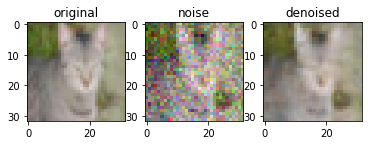

0.009301500465682004
0.0018085037252333006


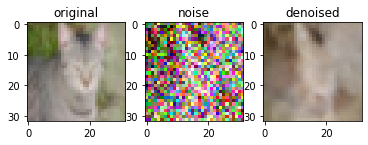

0.06423948776161378
0.005378082184701831


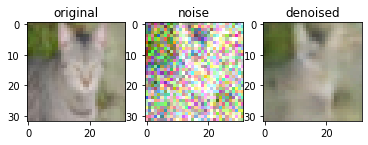

0.06284711724643248
0.0037316035883957275


In [39]:
index = 320
visualize_results(index, x_test, noisy_x_test_1, denoised_x_test_1)
visualize_results(index, x_test, noisy_x_test_2, denoised_x_test_2)
visualize_results(index, x_test, noisy_x_test_3, denoised_x_test_3)